Epoch 1/10
25/25 [==============================] - 1s 15ms/step - loss: 1.4674 - accuracy: 0.2412 - val_loss: 1.4481 - val_accuracy: 0.2650
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 1.4291 - accuracy: 0.2463 - val_loss: 1.4253 - val_accuracy: 0.2150
Epoch 3/10
25/25 [==============================] - 0s 6ms/step - loss: 1.4128 - accuracy: 0.2488 - val_loss: 1.4166 - val_accuracy: 0.2050
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 1.4049 - accuracy: 0.2450 - val_loss: 1.4117 - val_accuracy: 0.2050
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 1.4005 - accuracy: 0.2425 - val_loss: 1.4084 - val_accuracy: 0.2450
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 1.3981 - accuracy: 0.2488 - val_loss: 1.4066 - val_accuracy: 0.2350
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 1.3952 - accuracy: 0.2600 - val_loss: 1.4054 - val_accuracy: 0.2350
Epoch 8/10
25/25 [=

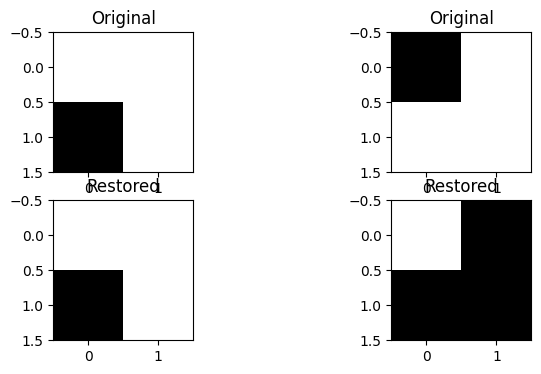

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Generate synthetic 2x2 puzzle dataset
def generate_2x2_puzzle_data(num_samples=1000):
    puzzles = np.random.randint(0, 2, size=(num_samples, 2, 2))
    return puzzles

# Function to create a simple neural network model
def create_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(2, 2)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to visualize the original and restored puzzles
def visualize_results(original, restored):
    plt.figure(figsize=(8, 4))
    
    for i in range(2):
        plt.subplot(2, 2, i+1)
        plt.imshow(original[i], cmap='gray')
        plt.title('Original')

        plt.subplot(2, 2, i+3)
        plt.imshow(restored[i], cmap='gray')
        plt.title('Restored')

    plt.show()

# Generate dataset
X = generate_2x2_puzzle_data()
y = np.arange(X.shape[0])  # Labels for simplicity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure labels are within the valid range
num_classes = 4  # Adjust this based on the number of classes in your problem
y_train = y_train % num_classes
y_test = y_test % num_classes

# Create and train the neural network model
model = create_model()
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc}")

# Make predictions on the test set
predictions = model.predict(X_test)

# Choose the class with the highest probability as the predicted label
predicted_labels = np.argmax(predictions, axis=1)

# Visualize a few original and restored puzzles
num_visualized = 2
visualize_results(X_test[:num_visualized], X_test[predicted_labels[:num_visualized]])
